In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
%matplotlib inline

**Problem 1.A**
Write a code which computes
$$\sum_{j=0}^{\infty}e^{-j}$$
using a recursion and a tolerance based while loop approach.

$$\frac{a_j}{a_{j-1}}= \frac{e^{-j}}{e^{-(j-1)}}=\frac{1}{e}$$
Then, $$a_j = \frac{1}{e}a_{j-1}$$
And
$$a_0 = e^{-0} = 1$$

In [2]:
def sumfunc(tol):
    aj = 1
    tj = 1
    while np.abs(aj)>=tol:
        aj *= 1/np.exp(1)
        tj += aj
    return tj


**Problem 1.B** Run your code in Problem 1.A  for tolerances `1e-2, 1e-4, 1e-6, 1e-8`

In [3]:
tols = [1e-2,1e-4,1e-6,1e-8]
sums = [sumfunc(x) for x in tols]
print(sums)

[1.5780553786637388, 1.5819502851677112, 1.5819762229389809, 1.5819767036086296]


**Problem 1.C** Using the formula for the sum of a geometric progression, compute
$$\sum_{j=0}^{\infty}e^{-j}$$
to 9 significant figures.

$$\sum_{j=0}^{\infty}e^{-j} = \frac{1}{1-e^{-1}}$$

In [4]:
estimate = 1/ (1 - 1/(np.exp(1)))
print('sum = %1.9f' %estimate)

sum = 1.581976707


**Problem 1.D** Compare your result from 1.B and 1.C and discuss your observation.

In [5]:
err = sums - estimate
print(err)

[-3.92132821e-03 -2.64217016e-05 -4.83930346e-07 -3.26069682e-09]


As the tolerance decreases, the error also decreases. The smaller tolerance increases the accuracy. The sum is smaller than the geometric series progression because the code does not infinitely compute the sum.

**Point: 10/10**

**Problem 2.A** Write a code to graph the following in the interval $[-1,4]$
$$y(x) = \begin{cases}
0 &\textrm{for} & x<0 \\
x &\textrm{for} & 0\leq x\leq 1 \\
2-x &\textrm{for} & 1< x\leq 2 \\
0 & \textrm{for} & x>2
\end{cases}$$

In [6]:
def hammerhead_shark(x):
    if (x<0.):
        return 0.
    elif (x<=1.):
        return x
    elif (x<=2.):
        return (2.-x)
    else:
        return 0.

**Problem 2.B** Create 11 points from -1 to 4 and assign it to x. Using this x value, plot y(x)

Text(0.5, 1.0, '11 data points')

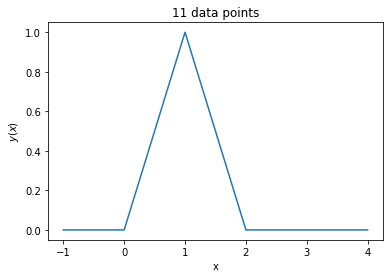

In [7]:
x1 = np.linspace(-1.,4.,int(11))
y1 = [hammerhead_shark(i) for i in x1]
plt.plot(x1,y1,label= '11 points')
plt.xlabel('x')
plt.ylabel('$y(x)$')
plt.title('11 data points')

**Problem 2.C** Create 1e1 points from -1 to 4 and assign it to x. Using this x value, plot y(x)

Text(0.5, 1.0, '10 data points')

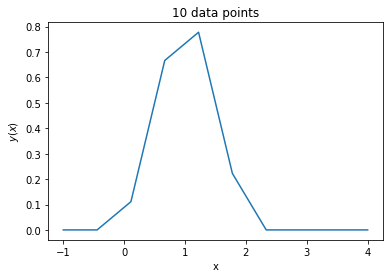

In [8]:
x2 = np.linspace(-1.,4.,int(1e1))
y2 = [hammerhead_shark(k) for k in x2]
plt.plot(x2,y2,label= '1e1 points')
plt.xlabel('x')
plt.ylabel('$y(x)$')
plt.title('10 data points')

**Problem 2.D** Create 1e5 points from -1 to 4 and assign it to x. Using this x value, plot y(x)

Text(0.5, 1.0, '1e5 data points')

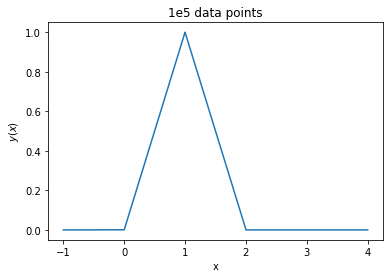

In [9]:
x3 = np.linspace(-1.,4.,int(1e5))
y3 = [hammerhead_shark(k) for k in x3]
plt.plot(x3,y3,label= '1e1 points')
plt.xlabel('x')
plt.ylabel('$y(x)$')
plt.title('1e5 data points')

**Problem 2.E** Compare your plots. Discuss your observations.

The plots of 2.B and 2.D look similar and are smooth graphs, while plot 2.C is coarse, jagged and looks very different. This is because `np.linspace(-1.,4,11)`and `np.linspace(-1.,4,1e5)` include x-values where the function changes, while `np.linspace(-1.,4.,10)` does not include the x values at which the function changes. For this plot, the more data points present do not necessarily mean that the plot will appear more smooth, only because the different cases of the function are linear or constant, so as long as the array includes the x-values at which the function is changing, the plot will appear smooth.

**Point: 10/10**

**Problem 3.A** Given that
$$\cos(x) = \sum_{j=0}^{\infty} \frac{(-1)^j}{(2j)!}x^{2j}, \sin(x)=\sum_{j=0}^{\infty}\frac{(-1)^j}{(2j+1)!}x^{2j+1}$$
and $$\cos(a-b)=\cos(a)\cos(b)+\sin(a)\sin(b),$$
derive a Taylor series for
$$\cos(2x^4)\cos(x^4)+\sin(2x^4)\sin(x^4)$$ about $x=0$.

$$\cos(2x^4)\cos(x^4)+\sin(2x^4)\sin(x^4)=\cos(2x^4-x^4)=\cos(x^4)$$
$$\cos(x^4)=\sum_{j=0}^{\infty}\frac{(-1)^j}{(2j)!}(x^4)^{2j} = \sum_{j=0}^{\infty} \frac{(-1)^j}{(2j)!}x^{8j}$$

**Problem 3.B** Using the result from 3.A, write a code that computes the Taylor series of
$$\cos(2x^4)\cos(x^4)+\sin(2x^4)\sin(x^4)$$ using recursion, vectorization, and a tolerance based while loop approach.

In [10]:
def taylor(x,tol):
    tot = np.ones(x.size)
    aj = np.ones(x.size)
    j = 1
    while np.max(np.abs(aj))>=tol:
        a_j = -(x**8.) / ((2.*j) * (2*j - 1.))
        aj *= a_j
        tot += aj
        j += 1
    return tot

**Problem 3.C** On the interval $[0,\pi]$, plot the semi-log error in your approximation for tolerance values $10^{-4}$,$10^{-6}$, and $10^{-8}$. Label axes and provide a legend for your graph.

C:\Users\Malida\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.
C:\Users\Malida\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\Malida\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
C:\Users\Malida\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


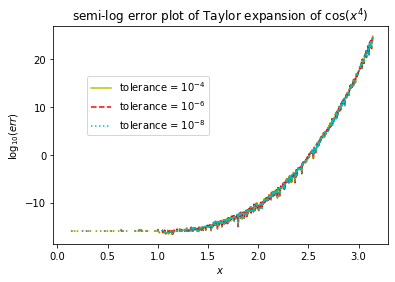

In [11]:
x = np.linspace(0.,np.pi,1e3)
yreal = np.cos(x**4)
ytol1 = taylor(x,1e-4)
ytol2 = taylor(x,1e-6)
ytol3 = taylor(x,1e-8)
err1 = np.log10(np.abs(yreal-ytol1))
err2 = np.log10(np.abs(yreal-ytol2))  
err3 = np.log10(np.abs(yreal-ytol3))
plt.plot(x,err1,label = "tolerance = $10^{-4}$",c='y')
plt.plot(x,err2,label = "tolerance = $10^{-6}$",c='r',ls = "--")
plt.plot(x,err3,label = "tolerance = $10^{-8}$",c='c', ls = ":")
plt.xlabel("$x$")
plt.ylabel("$\log_{10}(err)$")
plt.title("semi-log error plot of Taylor expansion of $\cos(x^4)$")
plt.legend(loc=(.1,0.5))

**Problem 3.D** Describe your graphs and comment on tends you observe.

For all three tolerance values, the error is fiarly small for x values near zero. Around $x= 1.5$ the error starts to increase rapidly.

**Point: 12/12**

**Problem 4.A** The Laguerre Polynomials, $L_n(x)$, defined for non-negative integer $n$, is described by the series:
$$L_n(x)= \sum_{k=0}^n\frac{n!}{k!(n-k)!} \frac{(-1)^k}{k!}x^k, -2\leq x\leq2$$
Using a `for`-loop, vectorized recursive approach, write a function which compputes the Laguerre functions for any non-negative integer $n$.

$$\begin{aligned}
\frac{a_k}{a_{k-1}} &= \frac{\frac{n!}{k!(n-k)!} \frac{(-1)^k}{k!}x^k}{\frac{n!}{(k-1)!(n-(k-1))!} \frac{(-1)^{(k-1)}}{(k-1)!}x^{(k-1)}}\\
& = \frac{(k-1)!(n-k+1)!(k-1)!}{k!(n-k)!k!(-1)^{-1}x^{-1}} \\ 
& = -x\frac{(n-k+1)}{k^2}
\end{aligned}$$
$$a_k =  -x\frac{(n-k+1)}{k^2} a_{k-1}$$
$$a_0 = \frac{n!}{0!(n-0)!}\frac{(-1)^0}{0!}x^0=1$$

In [12]:
def laguerre(x,n):
    aj = 1
    tot = np.ones(x.size)
    for k in range(1,int(n)+1):
        aj*= -x*(n-k+1.)/(k**2.)
        tot += aj
    return tot
    

**Problem 4.B/C** Make a plot for $L_n(x)$ for $n  = 0,1,2,3,4$ on the same graph. Incldue a legend and axes.



C:\Users\Malida\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Laugerre Polynomials $L_n(x)$')

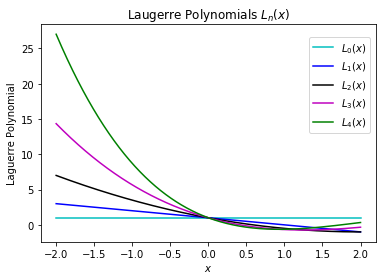

In [13]:
x = np.linspace(-2.,2.,1e3)
yL0 = laguerre(x,0)
yL1 = laguerre(x,1)
yL2 = laguerre(x,2)
yL3 = laguerre(x,3)
yL4 = laguerre(x,4)
plt.plot(x,yL0,label="$L_0(x)$", c= 'c')
plt.plot(x,yL1,label="$L_1(x)$", c = 'b')
plt.plot(x,yL2,label="$L_2(x)$", c = 'k')
plt.plot(x,yL3,label="$L_3(x)$", c = 'm')
plt.plot(x,yL4,label="$L_4(x)$", c = 'g')
plt.legend(loc=(.8,0.5))
plt.xlabel('$x$')
plt.ylabel('Laguerre Polynomial')
plt.title('Laugerre Polynomials $L_n(x)$')

**Problem 4.D** Write down the expression for $L_0(x)$ and $L_1(x)$. Compare you expression with the graph. Discuss observations.

$$L_0(x) = \frac{0! (-1)^0 }{0!(0-0)!0!}x^0 = 1$$
$$L_1(x) = \frac{1!(-1)^0}{0!(1-0)!0!}x^0 + \frac{1!(-1)^1}{1!(1-1)!1!}x^1 = 1-x$$

We find that $L_0(x) = 1$ for all x. When looking at the graph, we find that we have a constant line at around $y=1$ for $L_0(x)$.

We find that $L_1(x)=  1-x$. When considering the graph, we find that $L_1(x)$ is decreasing at a cosntant slope of 1, with a y-intercept at $(0,1)$, which is consistent with our result.

**Point: 14/14**

**Total: 46/46**